<a href="https://colab.research.google.com/github/AndresPk05/Acuaponia/blob/main/Metodos_de_Ensamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AUTORES**
Andres Felipe Parrado Bermudez

## **DATA SET PROBLEMA DE CLASIFICACION**

El dataset utilizado para el problema de clasificacion se puede encontrar en el siguiente link https://archive.ics.uci.edu/dataset/19/car+evaluation.

## **DATA SET PROBLEMA DE REGRESION**

El dataset se puede encontrar en el siguiente link:
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

## **Dependencias**

In [ ]:
#Dependencias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn import tree
import statsmodels.api as sm
from scipy.stats import chi2_contingency

## **Modelo de Clasificacion**

In [ ]:
## Se carga el dataset
dataframe = pd.read_csv("/content/car.data", names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"], sep= ",")
## Se imprime la informacion del dataset
print(dataframe.info())
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Con la informacion del dataset se puede evidenciar que se tienen 1728 filas y que no se tiene datos nulos en ninguna de las columnas

In [ ]:
columns = list(dataframe.columns)

In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
## Se transformar todos los datos del dataset en categoricos y se transforman a valores numericos
for i in range(0, len(columns)):
  le = LabelEncoder()
  dataframe[columns[i]] = dataframe[columns[i]].astype('category')
  dataframe[columns[i]] = le.fit_transform(dataframe[columns[i]])

In [ ]:
print(dataframe.head())

   buying  maint  doors  persons  lug_boot  safety  target
0       3      3      0        0         2       1       2
1       3      3      0        0         2       2       2
2       3      3      0        0         2       0       2
3       3      3      0        0         1       1       2
4       3      3      0        0         1       2       2


In [ ]:
## Se mira la correlacion de las diferentes variables con el target
print(stats.pearsonr(dataframe["buying"], dataframe["target"]))
print(stats.pearsonr(dataframe["maint"], dataframe["target"]))
print(stats.pearsonr(dataframe["doors"], dataframe["target"]))
print(stats.pearsonr(dataframe["persons"], dataframe["target"]))
print(stats.pearsonr(dataframe["lug_boot"], dataframe["target"]))
print(stats.pearsonr(dataframe["safety"], dataframe["target"]))

PearsonRResult(statistic=0.05142422396992509, pvalue=0.032554721549762286)
PearsonRResult(statistic=0.04019364632132075, pvalue=0.09486310573874875)
PearsonRResult(statistic=-0.03132740080926469, pvalue=0.1930419681618161)
PearsonRResult(statistic=-0.29946829781880896, pvalue=3.8767398626630834e-37)
PearsonRResult(statistic=0.033184324893435604, pvalue=0.16794778617567227)
PearsonRResult(statistic=-0.021043718225105486, pvalue=0.38199043037868263)


In [ ]:
cormat = dataframe.corr()
round(cormat,2)

,buying,maint,doors,persons,lug_boot,safety,target
buying,1.00,-0.00,-0.00,-0.0,-0.00,-0.00,0.05
maint,-0.00,1.00,-0.00,-0.0,-0.00,-0.00,0.04
doors,-0.00,-0.00,1.00,0.0,-0.00,0.00,-0.03
persons,-0.00,-0.00,0.00,1.0,0.00,0.00,-0.30
lug_boot,-0.00,-0.00,-0.00,0.0,1.00,-0.00,0.03
safety,-0.00,-0.00,0.00,0.0,-0.00,1.00,-0.02
target,0.05,0.04,-0.03,-0.3,0.03,-0.02,1.00


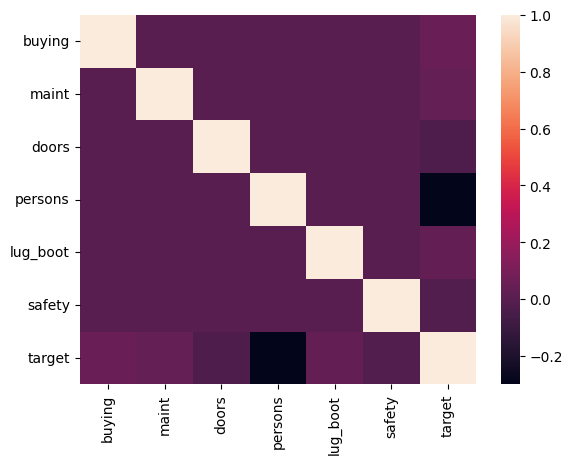

In [ ]:
sns.heatmap(cormat);

Con el grafico de correlacion se puede observar que respecto a la variable objetivo, las columnas mas relaccionas son buying, maint y lug_boot y la columna con menos correlacion es persons

In [ ]:
X = dataframe.iloc[:,0:6].values
Y = dataframe.iloc[:,6].values

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
## Se genera el modelo con RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=35, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(y_pred_rf)
rnd_clf.score(X_train, y_train)

[2 2 2 2 2 1 2 0 1 2 2 2 0 2 2 2 2 2 2 2 3 0 1 2 2 2 2 2 0 2 3 0 2 0 0 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 0 0
 1 0 2 2 0 2 2 0 2 2 2 2 2 1 2 2 2 0 2 2 2 3 2 2 0 2 2 2 2 2 3 0 2 0 2 2 2
 2 2 0 2 1 0 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2
 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 0 0 0
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0
 2 3 2 2 2 3 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 1 0 3 0 2 2 2
 2 2 2 2 0 2 2 3 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 3 1 2 2 2 2 2 2 2
 2 2 2 0 2 0 0 1 1 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 0 2 1
 2 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 3 2 0 2 3
 2 2 2 2 2 2 2 2 2 0 0 2 1 2 2 2 0 2 2 2 2 2 2 3 2 2 0 2 2 2 2 0 2 2 3 2 2
 0 0 0 2 2 2 2 2 2 0 0 2 0 2 1 3 2 2 2 3 2 2 0 2 0 2 2 2 2 2 2 0 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 

0.9346567411083541

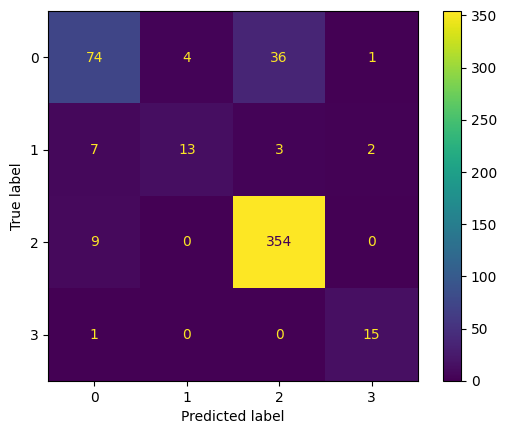

In [ ]:

cm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rnd_clf.classes_)
disp.plot()
plt.show()


In [ ]:


exactitud = accuracy_score(y_test, y_pred_rf)
print(exactitud)
print(classification_report(y_test, y_pred_rf))

0.8786127167630058
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       115
           1       0.76      0.52      0.62        25
           2       0.90      0.98      0.94       363
           3       0.83      0.94      0.88        16

    accuracy                           0.88       519
   macro avg       0.83      0.77      0.79       519
weighted avg       0.87      0.88      0.87       519



Con la diferentes metriz del modelo se puede determinar que tiene una buena puntuacion de precision pero con la categoria 2, con los demas no tiene tan buena puntucial sobre todo porque tambien el dataset esta desbalanceado sobre todo para las categorias 0 y 2 que es donde tiene la mejor puntuacion

****************************** Estimator ******************************


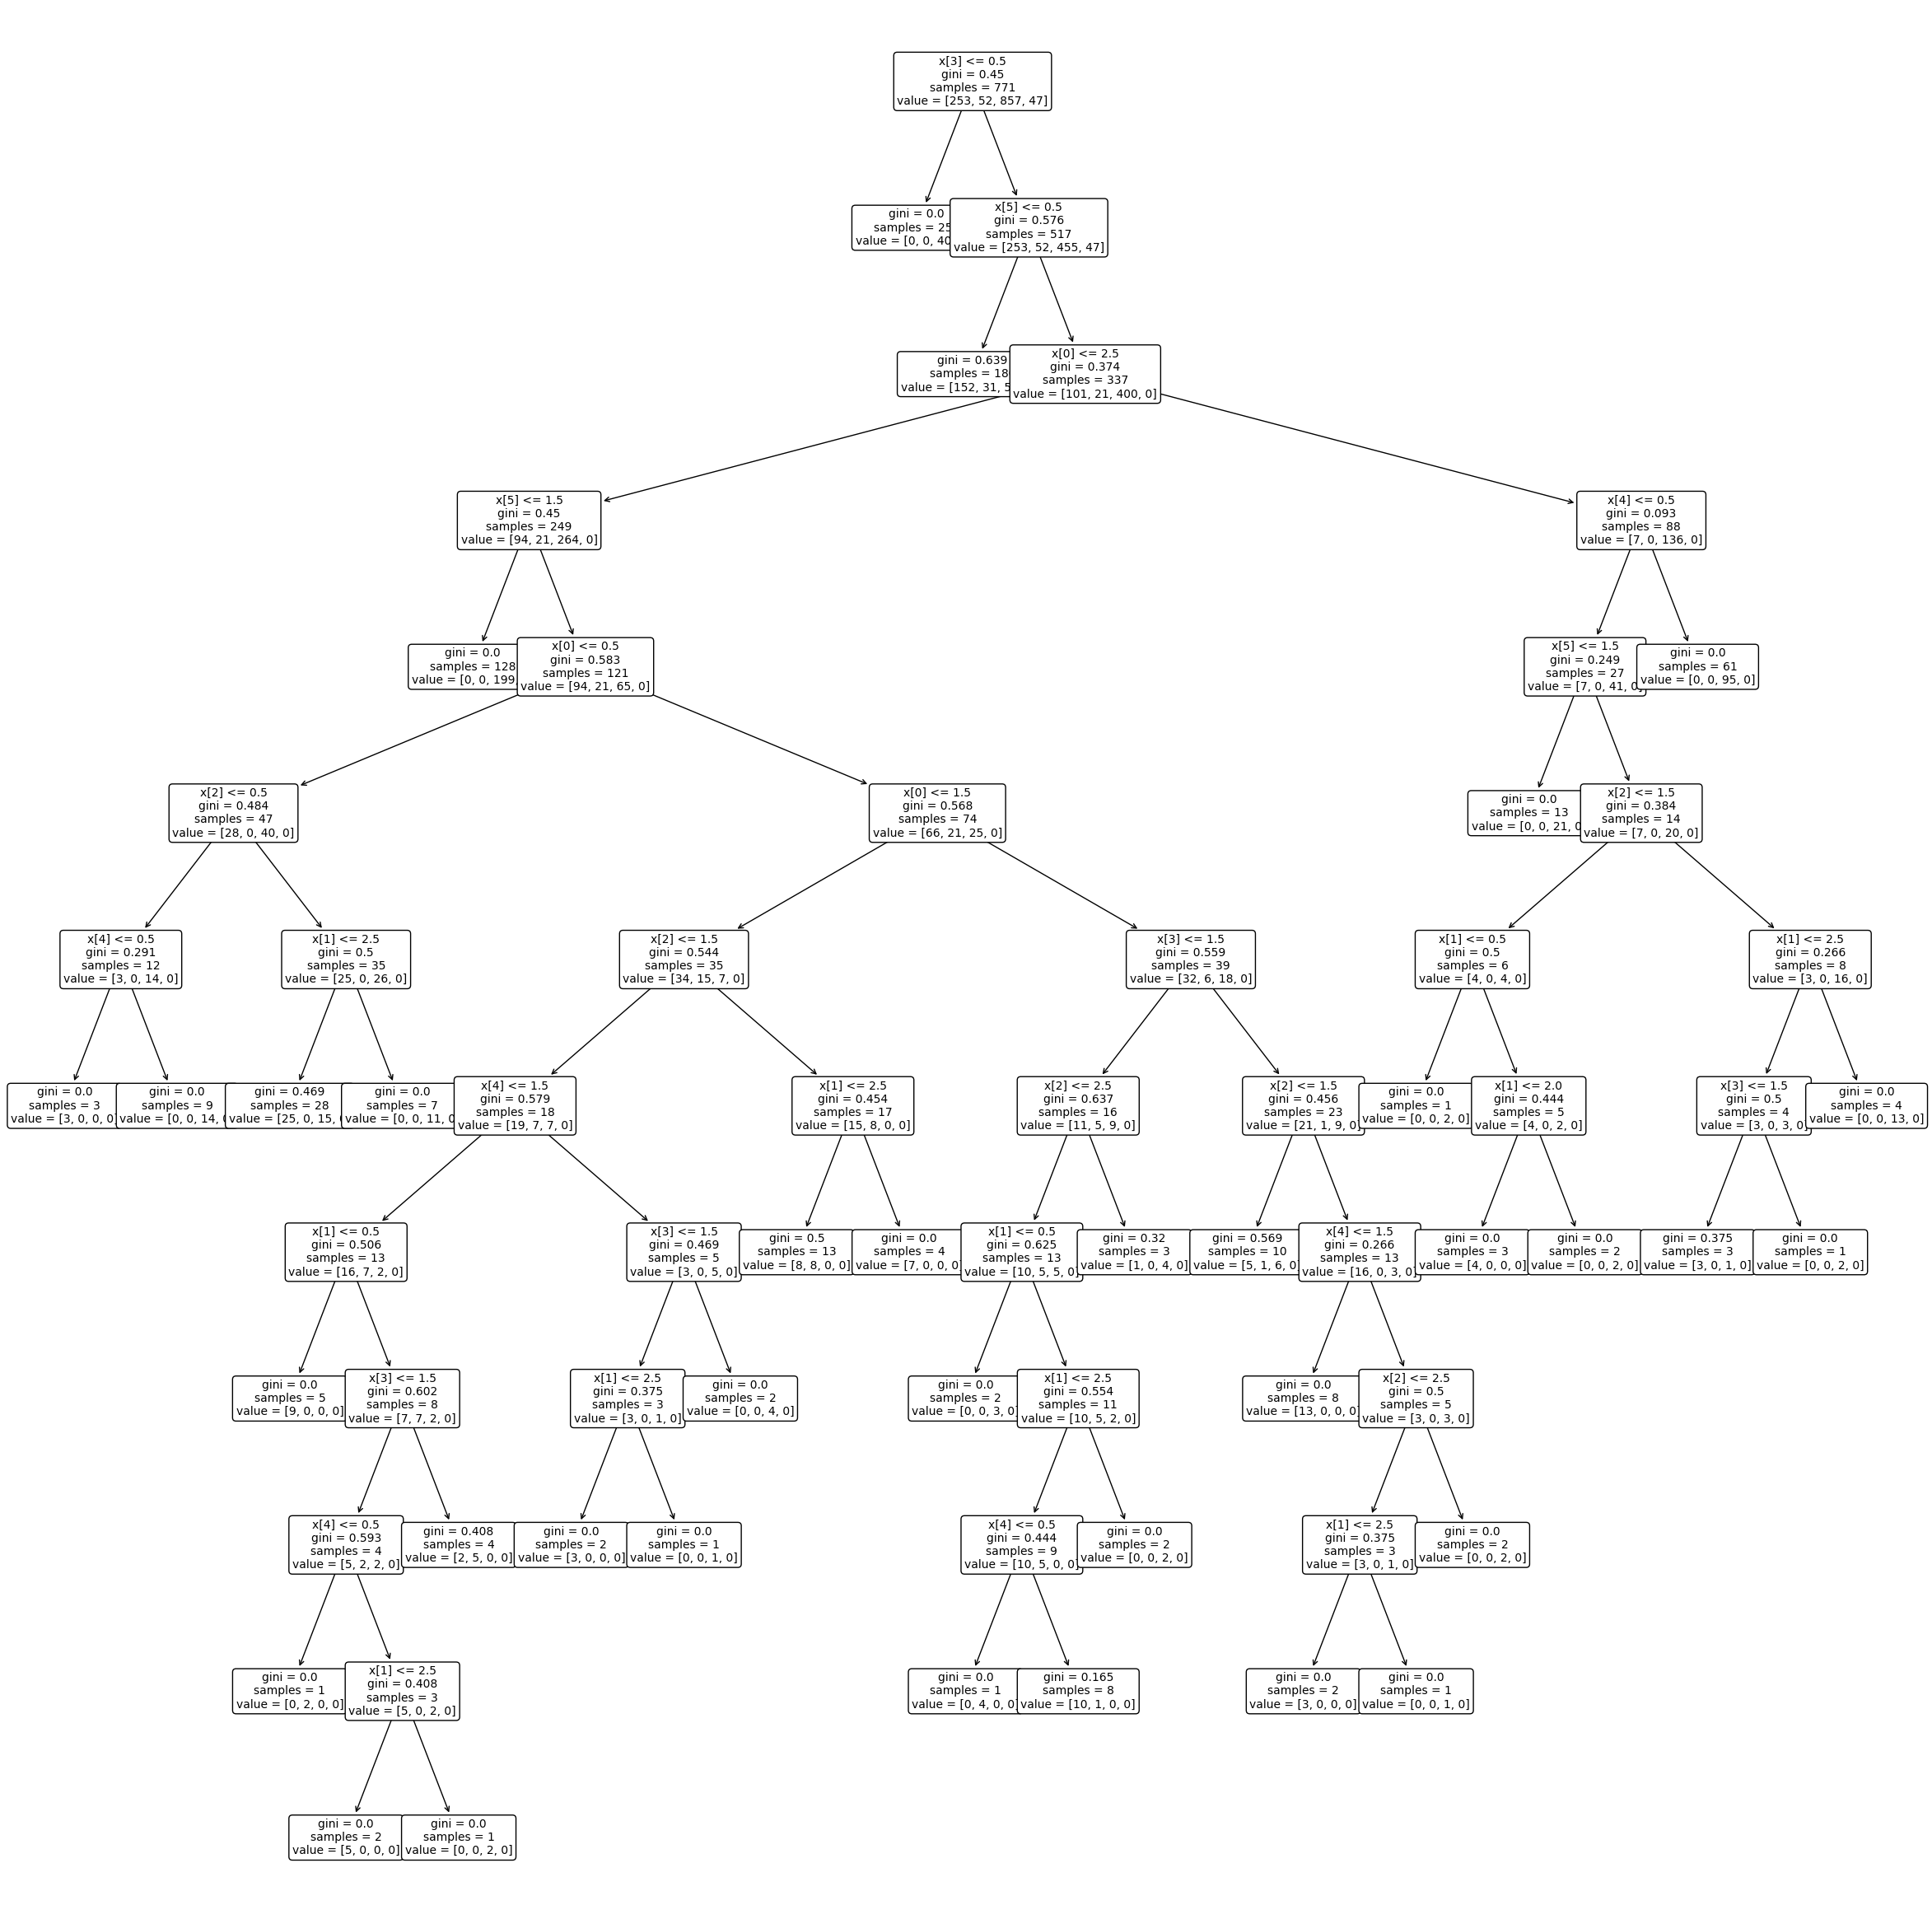

****************************** Estimator ******************************


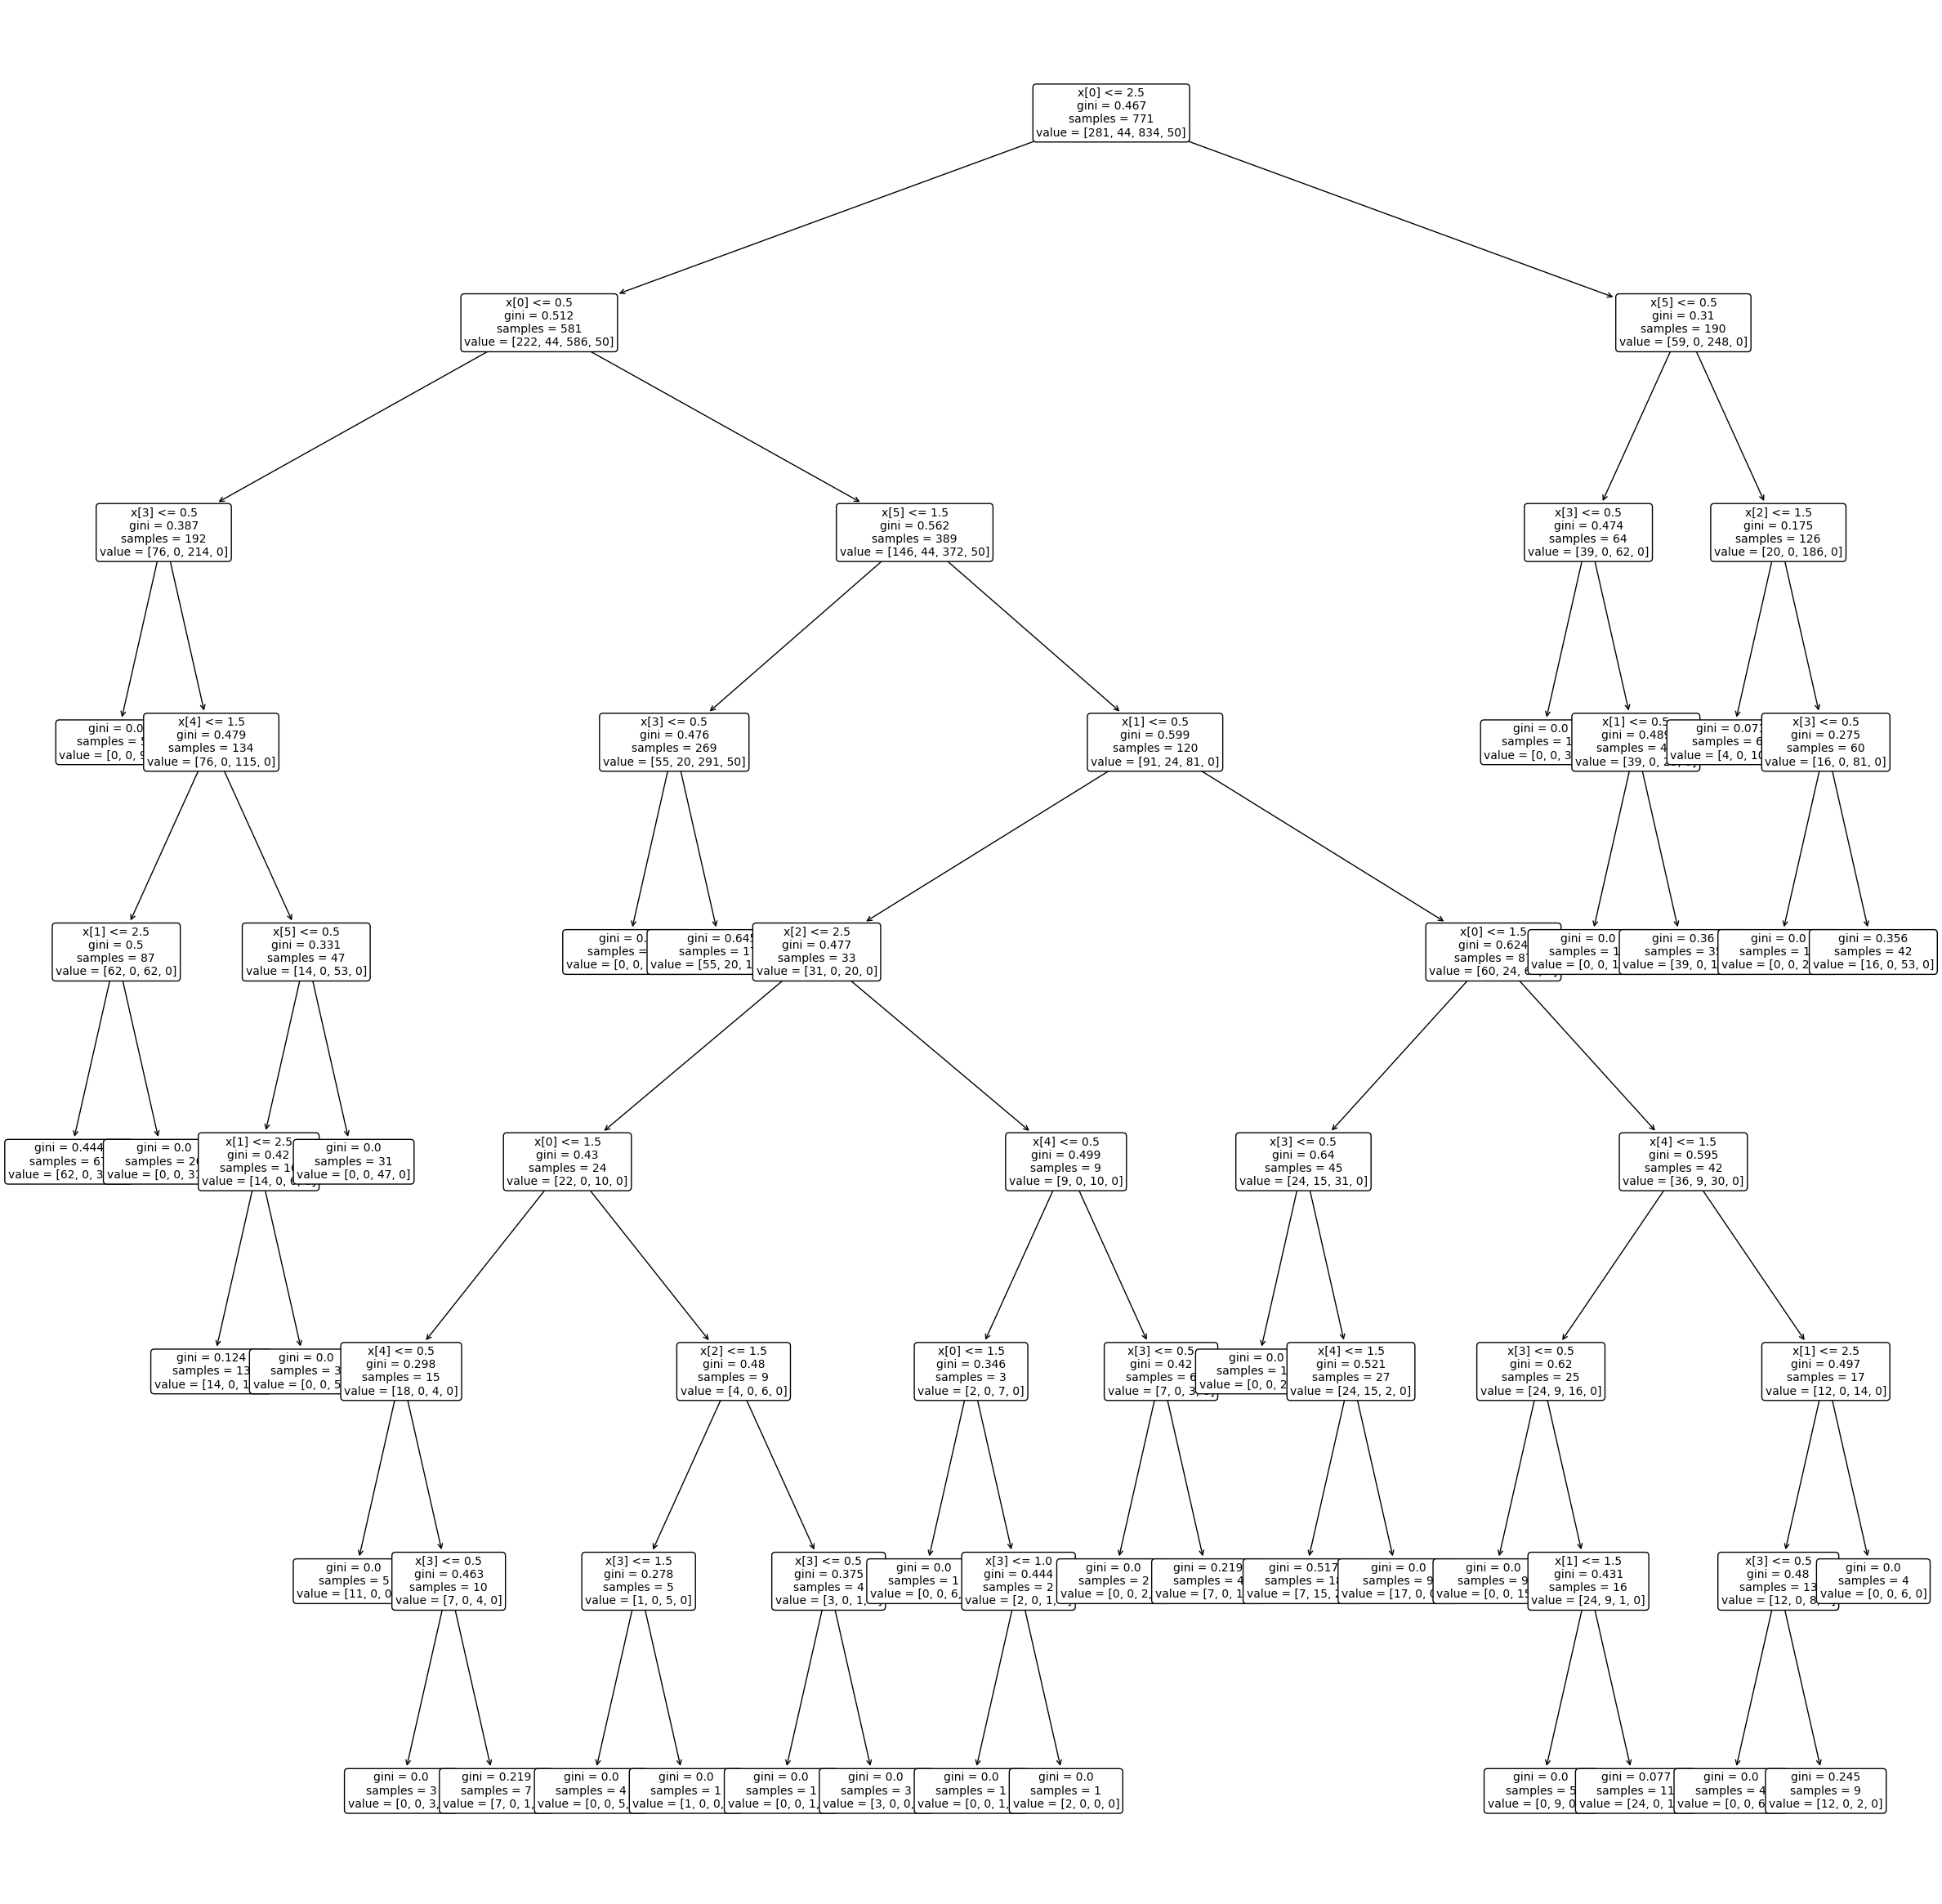

****************************** Estimator ******************************


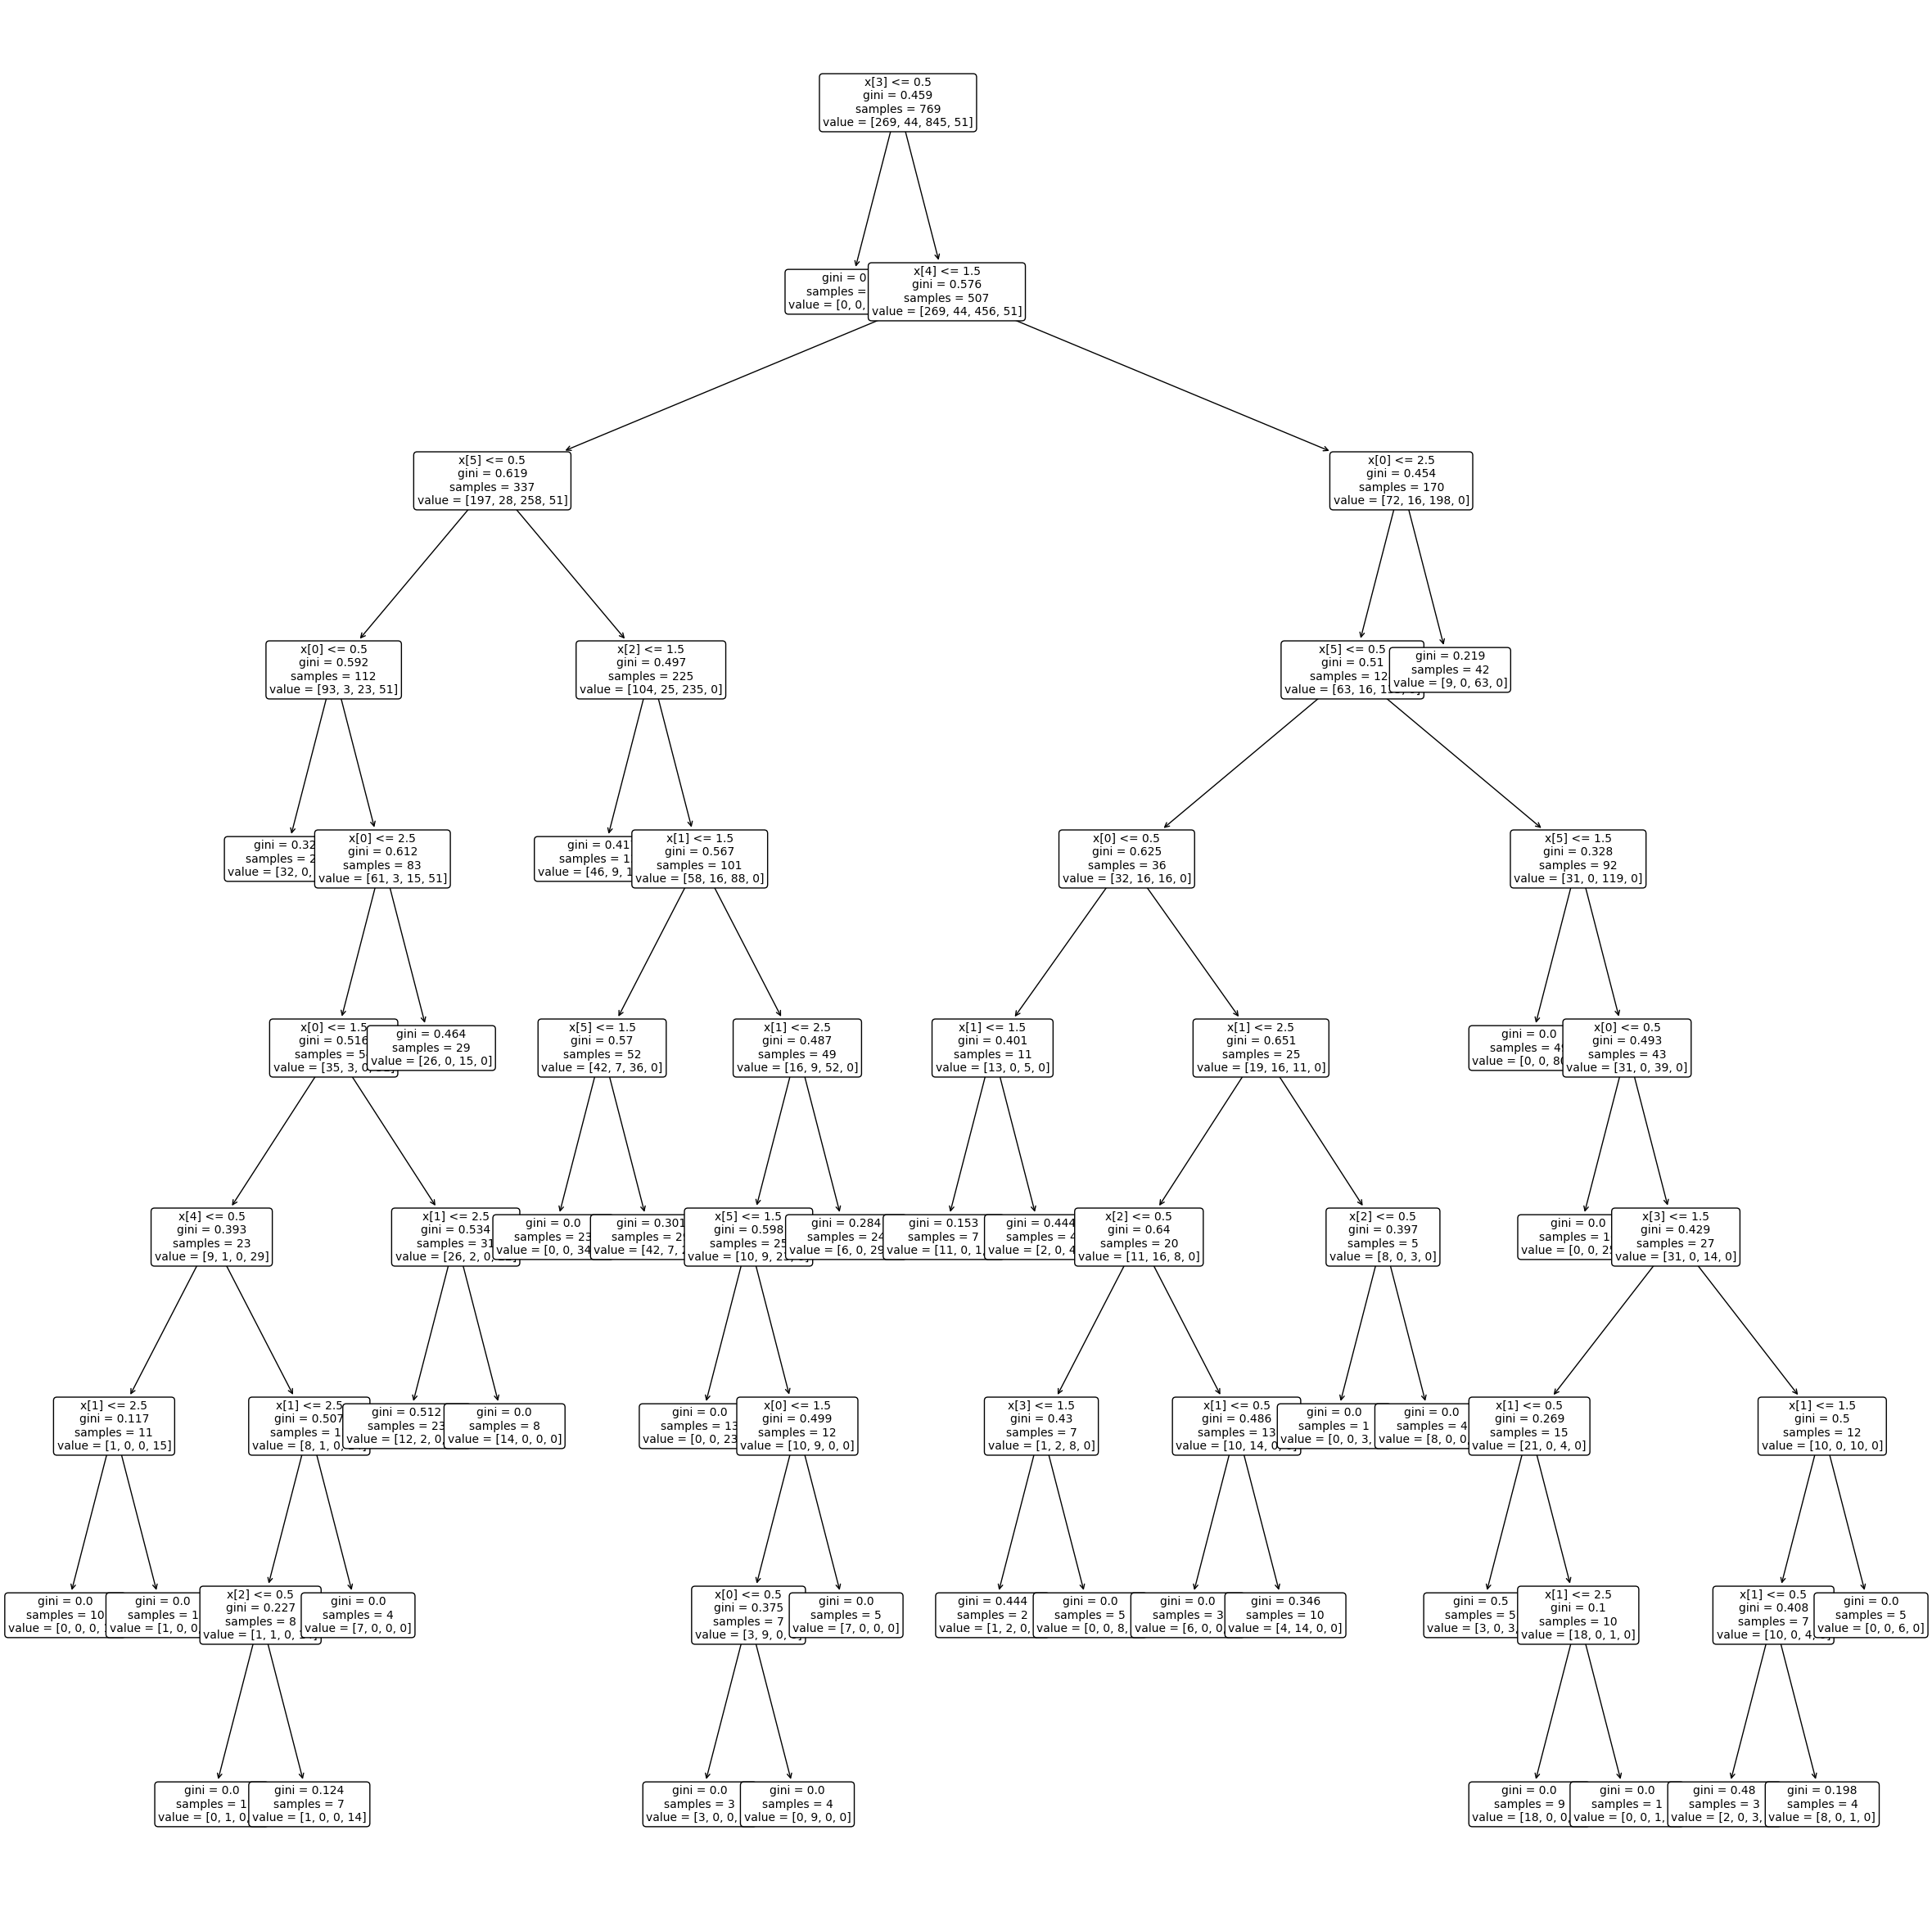

****************************** Estimator ******************************


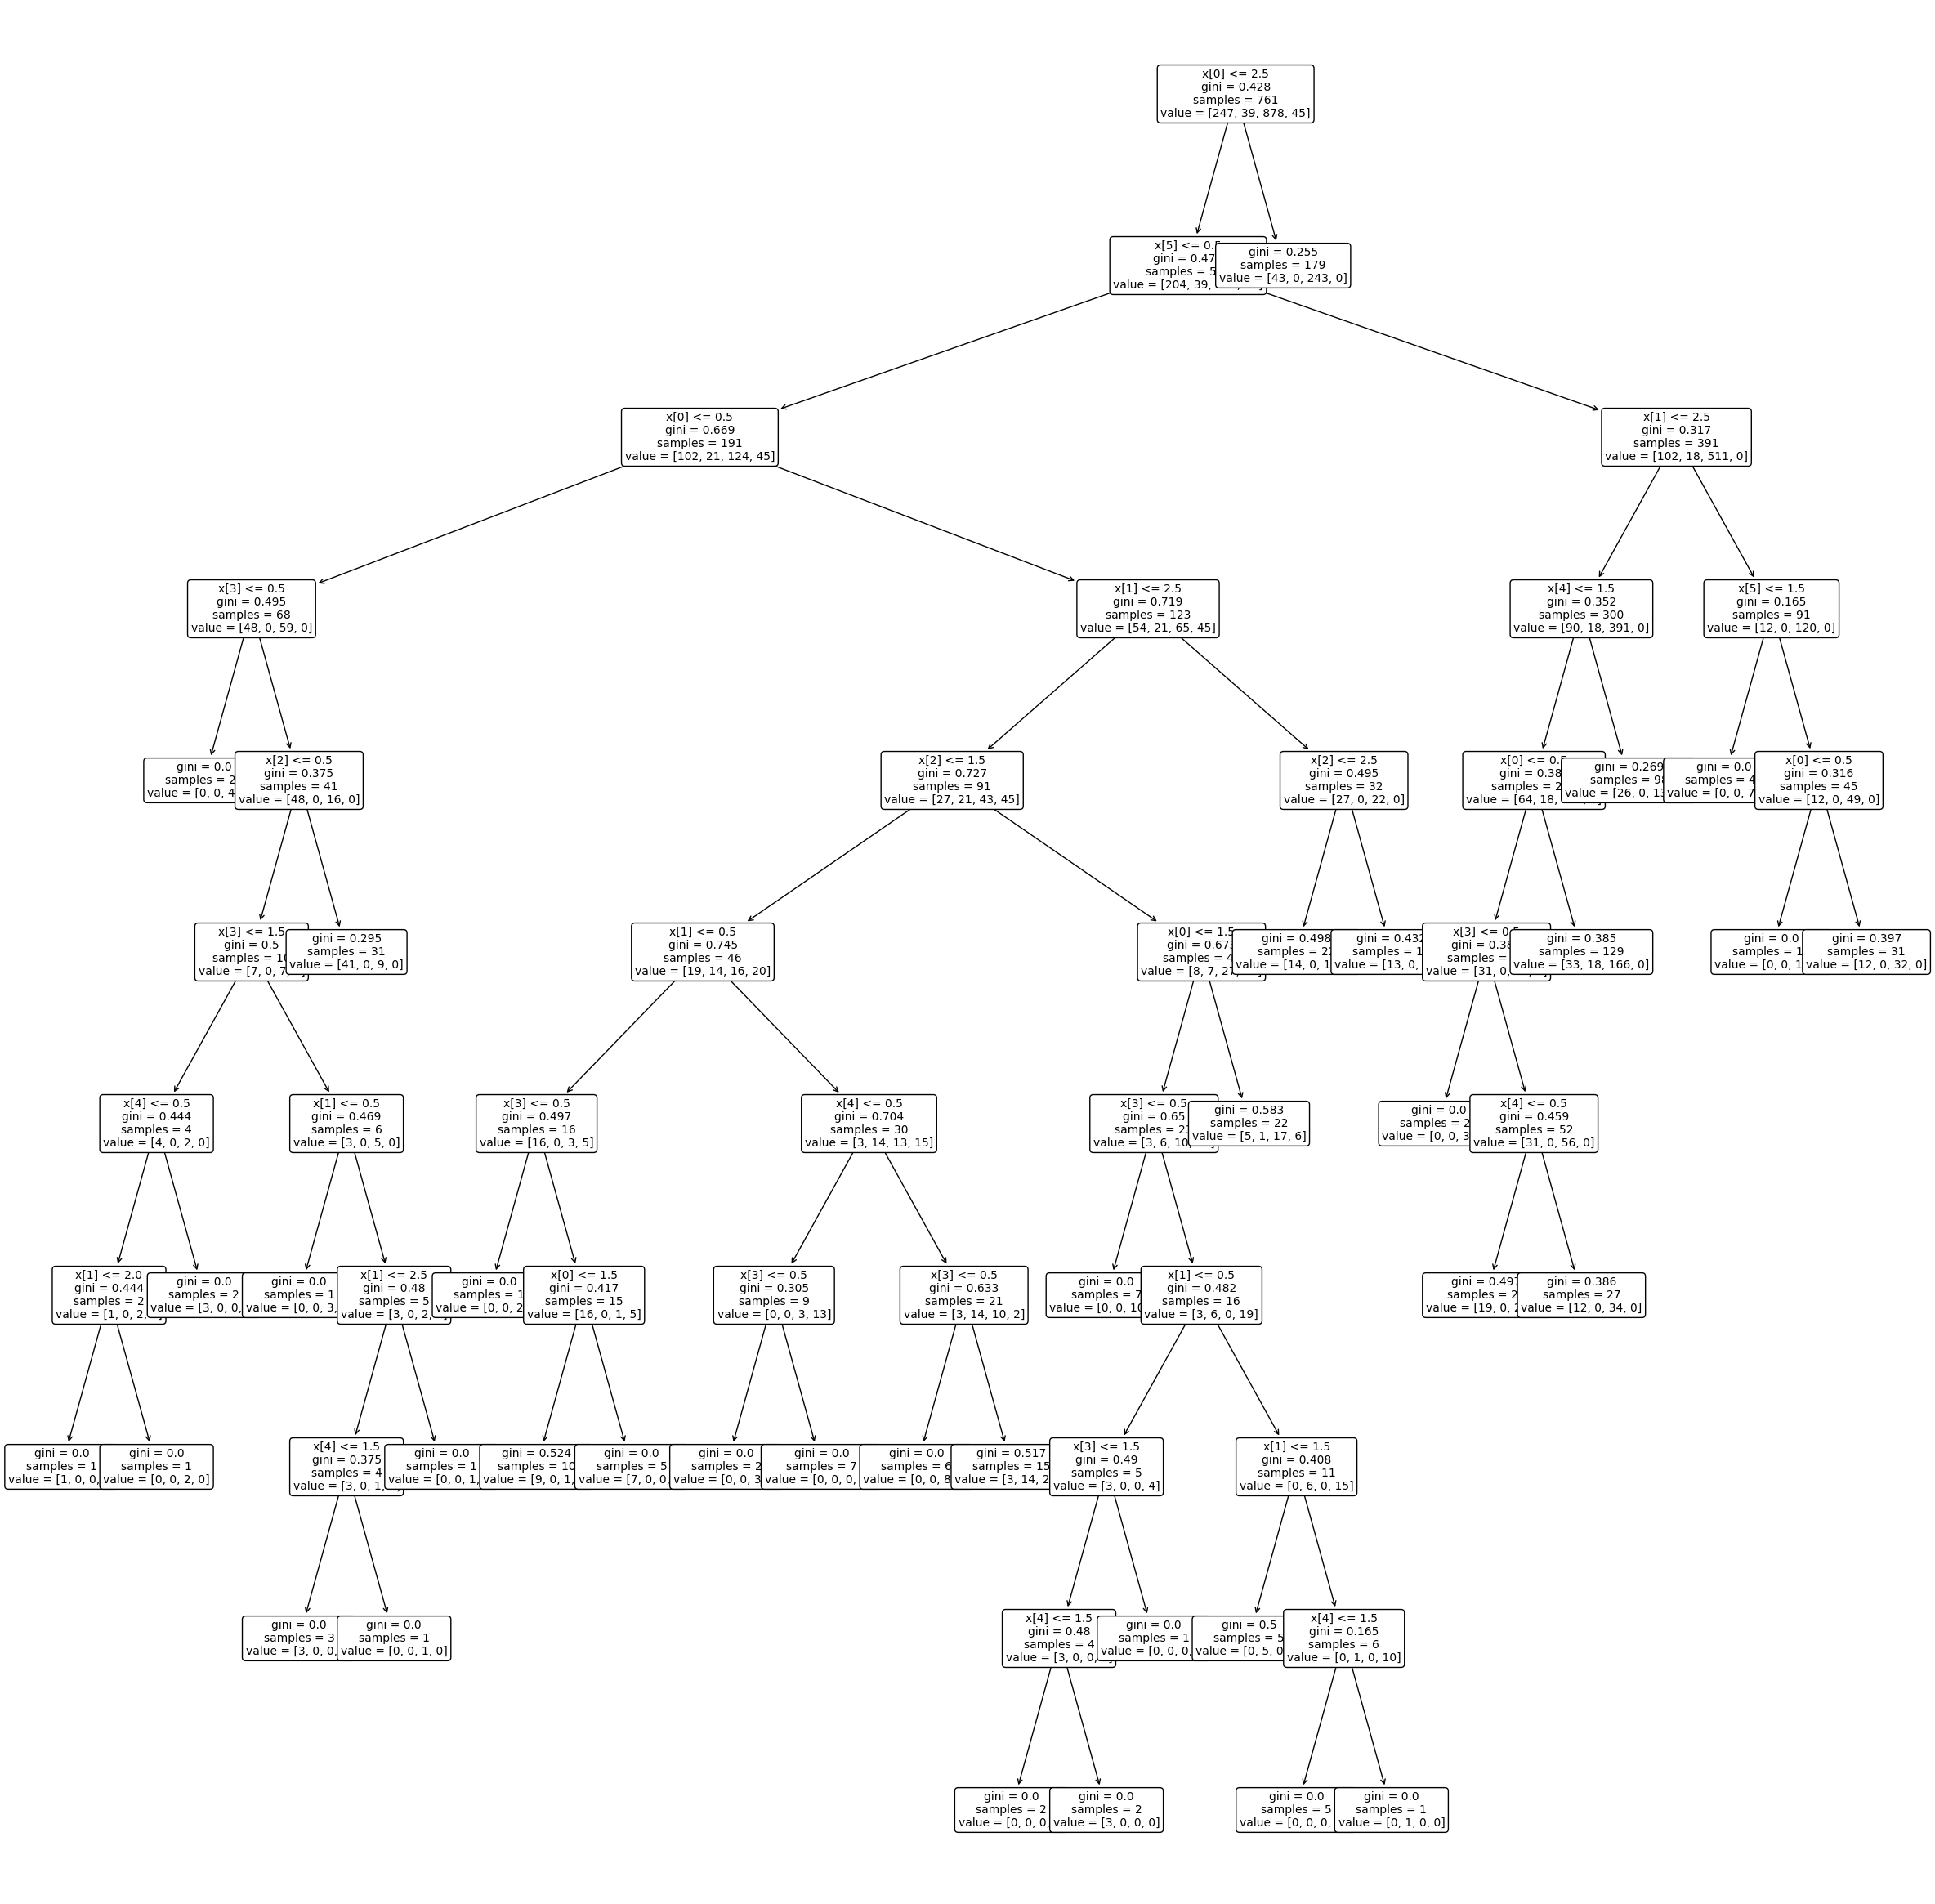

****************************** Estimator ******************************


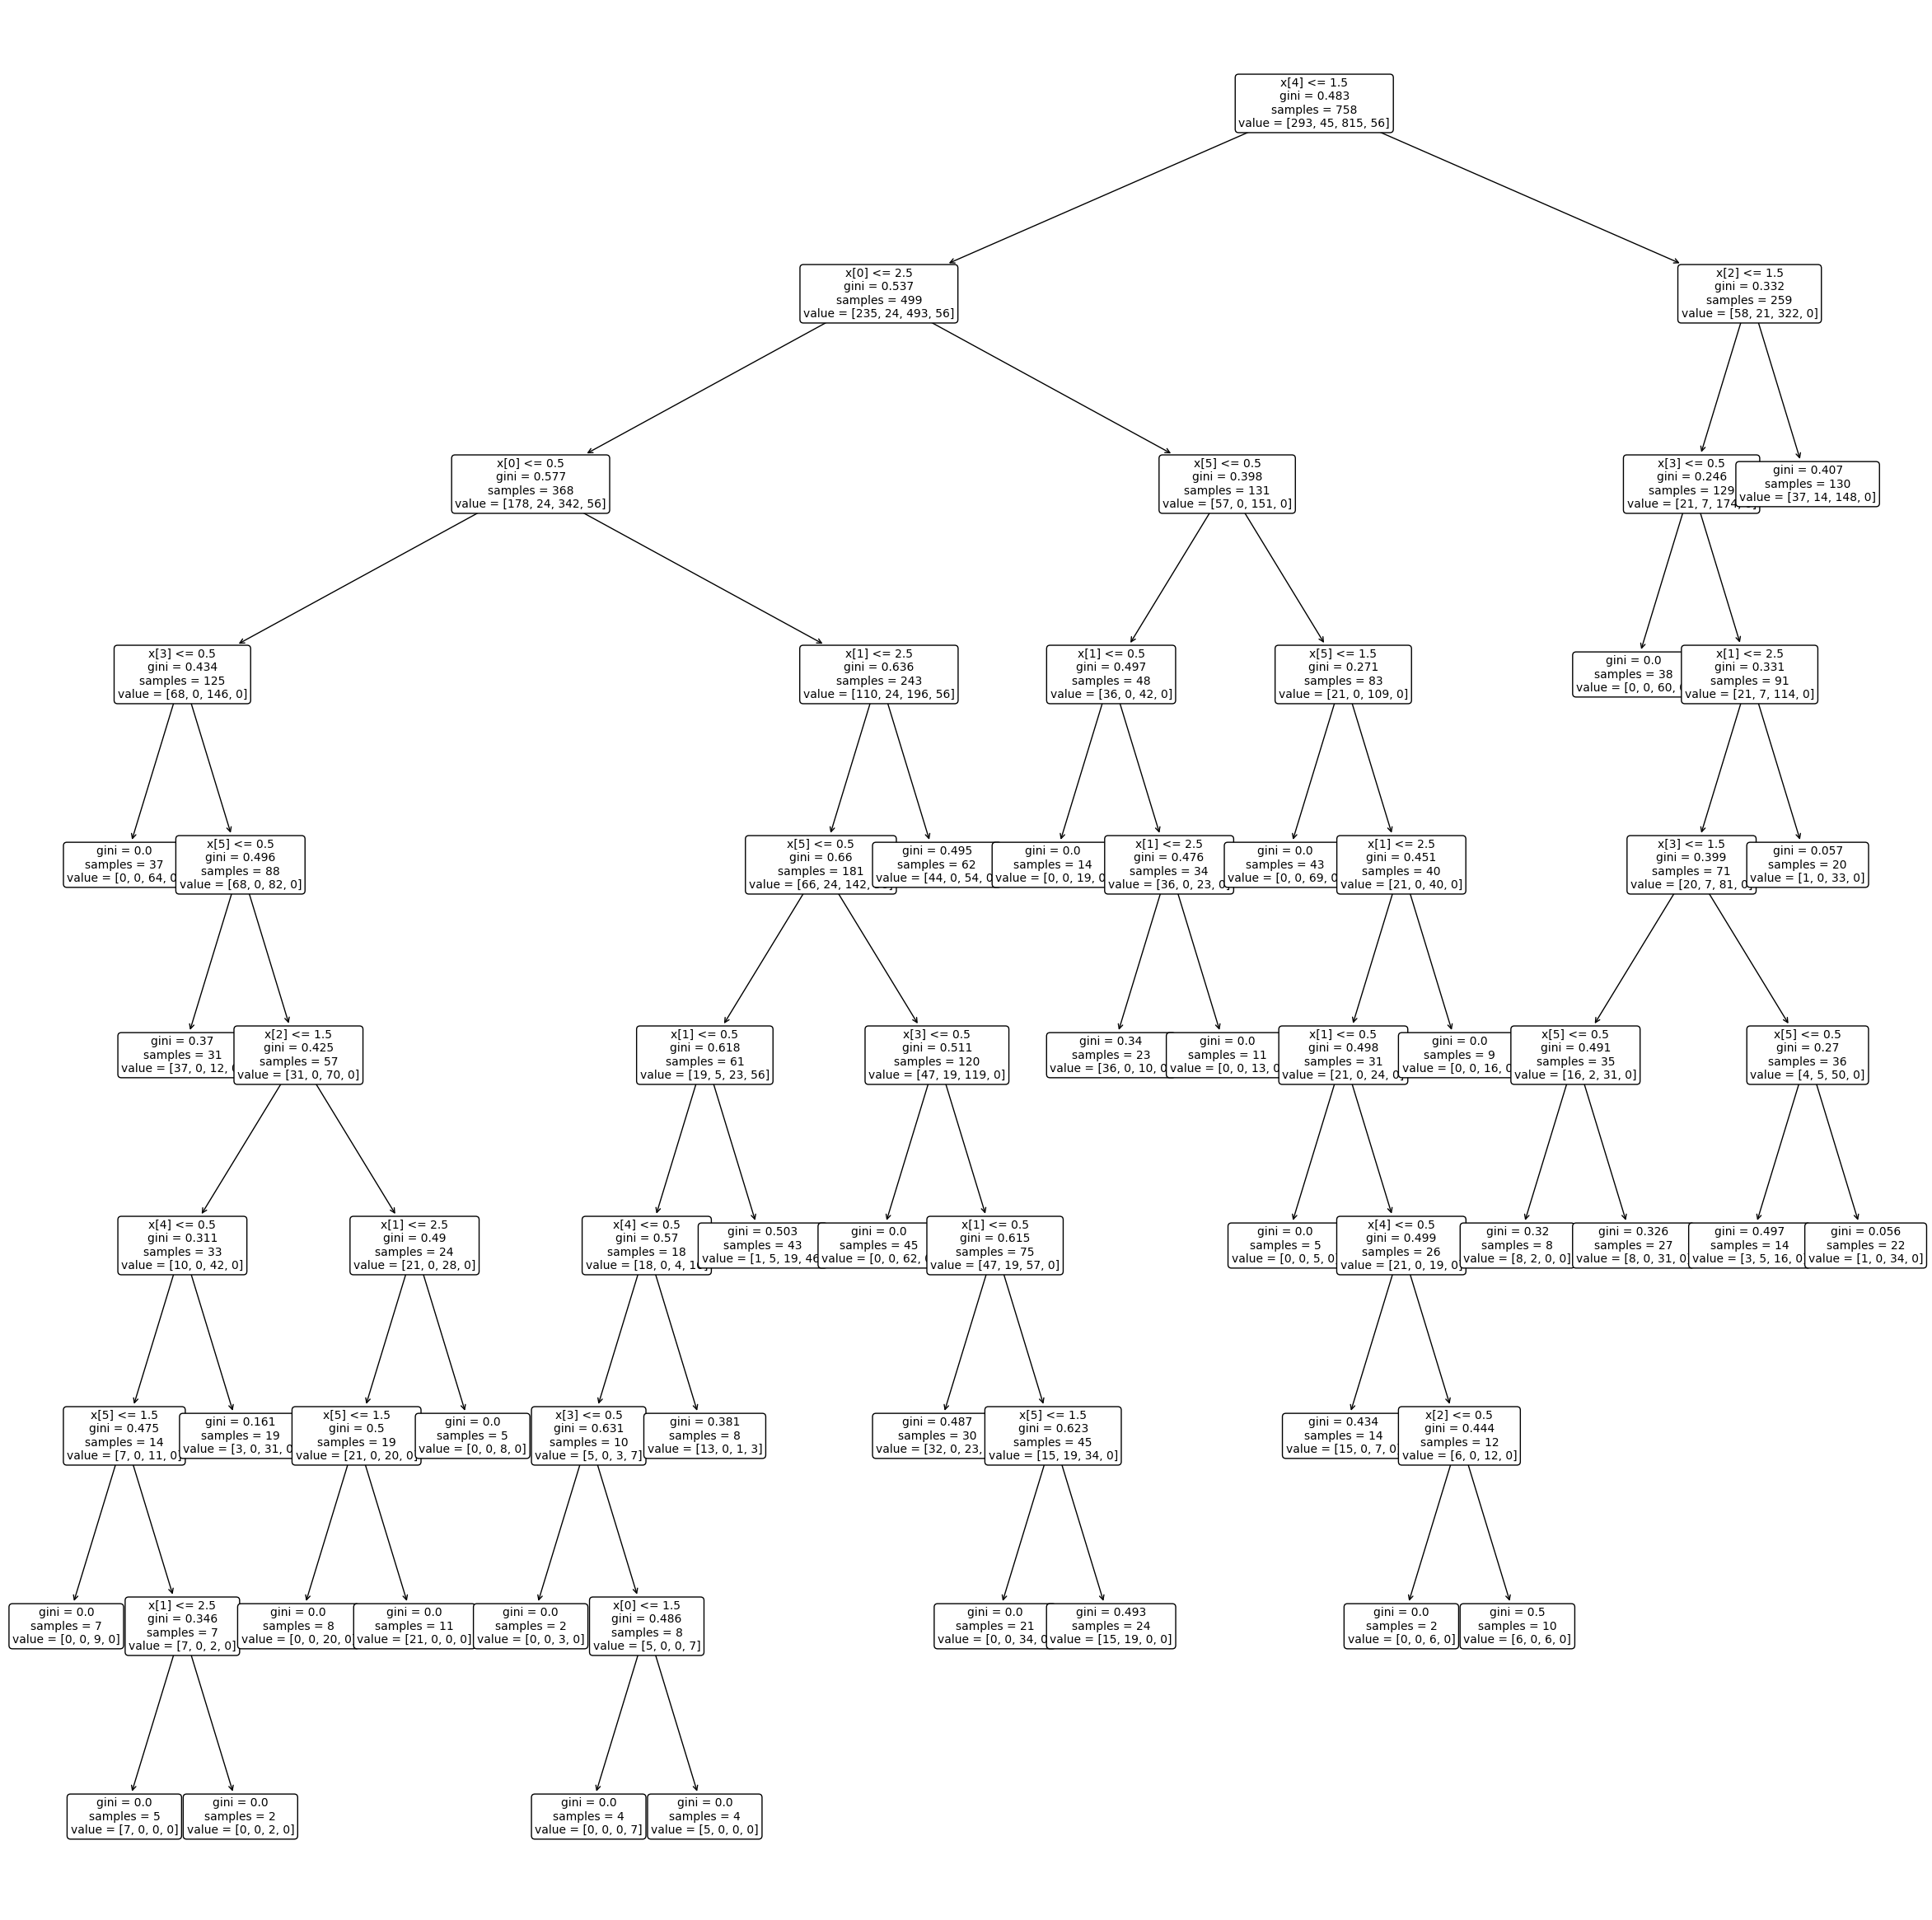

In [ ]:

for dt in rnd_clf.estimators_:
    print("*"*30, "Estimator", "*"*30)
    plt.figure(figsize=(30,30))
    tree.plot_tree(dt, rounded=True, fontsize=10)
    plt.show()

**Conclusion**
A la conclusion que se puede llegar viendo la matriz de confusion es que el modelo tiene la mayor cantidad de aciertos para la categoria unacc que es la mayor cantidad de carros que tiene el dataset mostrando asi el desbalanceo del dataset esto tambien se puede evidenciar en el classification_report, por tal motivo el modelo tiene un buen porcentaje de accuracy pero realmente la categoria que mejor clasificara es la de los autos tipo unacc en los demas no tendra un buen rendimiento.

## **Modelo de Regresion**

In [ ]:
 ##Se carga el dataset
 dataframe = pd.read_csv("/content/SeoulBikeData.csv",  sep= ",", encoding='unicode_escape')
 dataframe.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
## Los metodos para el calculo de cramerV se toman del siguiente link https://medium.com/@manindersingh120996/understanding-categorical-correlations-with-chi-square-test-and-cramers-v-a54fe153b1d6

def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v
def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(7,7))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()


            Date Seasons     Holiday Functioning Day
0     01/12/2017  Winter  No Holiday             Yes
1     01/12/2017  Winter  No Holiday             Yes
2     01/12/2017  Winter  No Holiday             Yes
3     01/12/2017  Winter  No Holiday             Yes
4     01/12/2017  Winter  No Holiday             Yes
...          ...     ...         ...             ...
8755  30/11/2018  Autumn  No Holiday             Yes
8756  30/11/2018  Autumn  No Holiday             Yes
8757  30/11/2018  Autumn  No Holiday             Yes
8758  30/11/2018  Autumn  No Holiday             Yes
8759  30/11/2018  Autumn  No Holiday             Yes

[8760 rows x 4 columns]
Else condition Met:  1.0000000000000004
Else condition Met:  0.9791685903709934
Else condition Met:  0.9790567812252825
Else condition Met:  0.9701322281023271
Else condition Met:  0.9791685903709934
Else condition Met:  1.0
Else condition Met:  0.11684617614885502
Else condition Met:  0.25781678008164394
Else condition Met:  0.979056781

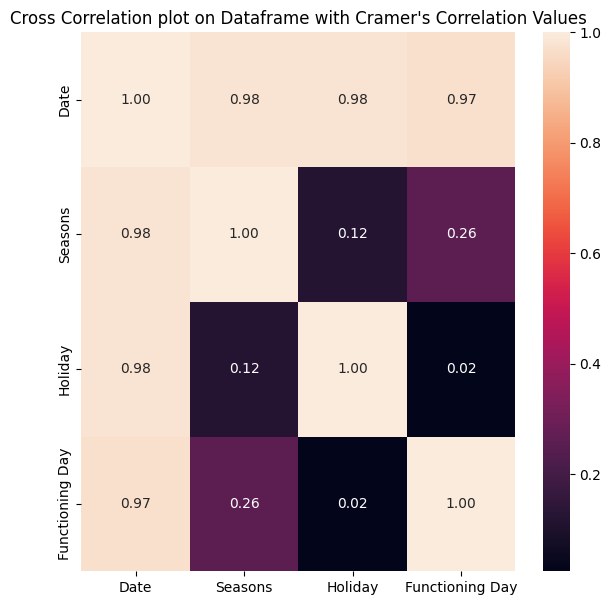

In [ ]:
# Seleccionar columnas "A" y "C"
df_nuevo = dataframe[['Date', 'Seasons', 'Holiday', 'Functioning Day']]

print(df_nuevo)
plot_cramer(df_nuevo)

Con el grafico de CramerV se puede observar la correlacion de las variables categorias del dataset, aqui esta la variable objetivo que es Functioning Day y se puede observar que la mayor correlacion es con la variable Date

In [ ]:
def convertCategoricalColumns(column):
  encoder =  LabelEncoder()
  dataConvert = encoder.fit_transform(column)
  return dataConvert

In [ ]:
  ## Primero se transforman las columnas categoricas
  dataframe['Seasons'] = convertCategoricalColumns(dataframe['Seasons']);
  dataframe['Holiday'] = convertCategoricalColumns(dataframe['Holiday']);
  dataframe['Functioning Day'] = convertCategoricalColumns(dataframe['Functioning Day']);

  # Convierte la columna de fecha en datetime si aún no lo es
  dataframe['Date'] = pd.to_datetime(dataframe['Date'])
  dataframe['Date'] = pd.Categorical(dataframe['Date'])

<ipython-input-24-c3927a063758>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


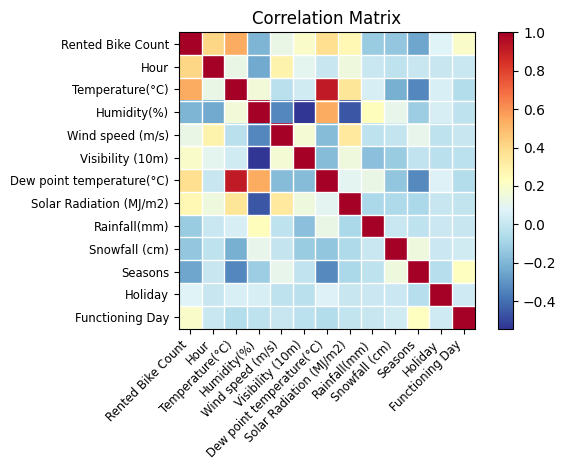

In [ ]:
corr = dataframe.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Una vez tratados los datos y volverlos todos numericos se procede a validar la correlacion de todas las variables para ver cuanto afectar al target con los cual se eliminaron las caracteristicas que menos afectan el valor de la variable objetivo

In [ ]:
## Se definen los features y la variable objetivo para entrenar el modelo
X = dataframe[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Seasons']]
y = dataframe['Functioning Day']

In [ ]:
## Se entrena el modelo con GradientBootsRegressor y se busca cual es la mejor cantidad de estimadores segun el modelo maximo 125
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=125)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
 for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=125)

In [ ]:
y_pred = gbrt_best.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_val, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 1.0789744686606606e-13


In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.284774678209543e-07


In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_val, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.204614293636882e-07
